In [1]:
import gym
import numpy as np
from matplotlib import pyplot as plt
import pprint
import pandas as pd
import random
from gym import wrappers 


This is the solution of the mountain car problem. We will try to reuse some of the Q-Learning code written for the previous question here. 


Also since the observations are on a continous line, we will have to bin them to small finite number for our algorithm to work well.


In [153]:
# This cell simply sets up the environment and sets up 
# all the required varaible as were set in the previous question

env = gym.make('MountainCar-v0')

Actions = [0, 1, 2]

num_states = [20, 20] # [dist, vel]
hi = env.observation_space.high
lo = env.observation_space.low
diff = hi - lo
bin_size = (diff[0]/num_states[0], diff[1]/num_states[1])

# States = np.zeros(num_states)
# States.shape
States = []
for i in range(num_states[0]):
  for j in range(num_states[1]):
    States.append((i, j))



In [154]:
#Converting continous values to discrete states
def which_state (ob):  
  return ((ob[0] - lo[0])//bin_size[0], (ob[1] - lo[1])//bin_size[1])

 


In [191]:
# Episilon Delta implementation
epsilon = 0.05
def epsilon_greedy (q, s, env):
  k = len(Actions)
  max_q = -13313 # -inf 
  A_max = None
  for a in Actions:
    # print((s))

    if (q[s][a] > max_q):
        A_max = a
        max_q = q[s][a]
  rnd = random.uniform(0, 1)
  if (rnd < (1 - epsilon)):
    return A_max
  return random.choice(Actions)

def max_q (q, s):
  k = len(Actions)
  max_q = -13313 # -inf 
  A_max = 2
  for a in Actions:
    if (q[s][a] > max_q):
      A_max = a
      max_q = q[s][a]
    
  return A_max

In [156]:
def take_action(S, A):
#   env.render()
  (ob, R, done,info ) = env.step(A)
  return (which_state(ob), R, done)

In [157]:
env.reset()
print(env.step(1))

(array([-5.81296969e-01,  4.33783154e-04]), -1.0, False, {})


In [158]:
lr = 0.8 # Learning rate 

def q_learning (beta):
    Q = {}
    #Initializing Q
    for s in States:
        Q[s] = {}
        for a in Actions:
            Q[s][a] = 5*a #Initialing

    alpha = lr
    tot_s = 0
    mean_step_history = []
    
    mean_reward_history = []
    final_pos_history = []
    for i in range(6500): #Num of episodes
        tot_r = 0
        S = which_state(env.reset())
        alpha = max (lr * ((0.89)**(i//130)), 0.00001) #Decresing learning (lr- scheduling) rate
        
        for j in range(250): # It will anyways stop at 200.
            A = epsilon_greedy(Q, S, env)

            (Sf, R, done) = take_action (S, A)
            if (done):
                final_pos_history.append(Sf[0])
                tot_s = j
                break
            max_q = - 73931 # -inf
            for a in Actions:
                max_q = max(max_q, Q[Sf][a])

            
            
            tot_r += beta**j * R
            Q[S][A] += alpha*(R + beta*max_q - Q[S][A]) # This is the update
            S = Sf
        mean_step_history.append(tot_s)
        mean_reward_history.append(tot_r)
        if (i%1000 == 0):
            print(i, tot_s)
#             render_q(Q)
    return Q, mean_reward_history, mean_step_history, final_pos_history


In [159]:
def render_q(Q):
    for i in range(1): #10000 episodes
        S = which_state(env.reset())
        total_cost = 0
        for j in range(250):
        #Since we don't have a termination state we go for finite steps.
          A = epsilon_greedy(Q, S, env)
          env.render()
          (Sf, R, done) = take_action (S, A)
          if (done):
            total_steps = j
            break
          
        print(total_steps)
# q_learning(0.9)

In [102]:
# print(Q)

In [103]:
# Q, rewardHis, stepHis, posHistory = q_learning(0.90) #Check if the fucntion works properly

In [119]:

num_it = 50
Q_mean, rewardHis_mean, stepHis_mean, posHistory_mean = q_learning(0.90) #Here is the main function called
rewardHis_mean = np.asarray(rewardHis_mean)
stepHis_mean = np.asarray(stepHis_mean)
posHistory_mean = np.asarray(posHistory_mean)
for i in range (num_it-1):
    print (i)
    Q, rewardHis, stepHis, posHistory = q_learning(0.90)
    rewardHis_mean += np.asarray(rewardHis)
    stepHis_mean += np.asarray(stepHis)
    posHistory_mean += np.asarray(posHistory)
    for s in States:
        for a in Actions:
            Q_mean[s][a] = Q[s][a]
            
rewardHis_mean /= num_it
stepHis_mean = stepHis_mean/ num_it
posHistory_mean /= num_it
for s in States:
    for a in Actions:
        Q_mean[s][a] / num_it


    

0 199
1000 199
2000 199
3000 195
4000 162
5000 199
6000 147
0
0 199
1000 199
2000 199
3000 149
4000 148
5000 148
6000 199
1
0 199
1000 199
2000 148
3000 152
4000 154
5000 155
6000 196
2
0 199
1000 199
2000 199
3000 199
4000 152
5000 151
6000 190
3
0 199
1000 152
2000 199
3000 147
4000 175
5000 146
6000 152
4
0 199
1000 199
2000 150
3000 167
4000 181
5000 159
6000 142
5
0 199
1000 199
2000 140
3000 158
4000 155
5000 152
6000 199
6
0 199
1000 190
2000 199
3000 199
4000 184
5000 150
6000 147
7
0 199
1000 199
2000 199
3000 140
4000 116
5000 155
6000 161
8
0 199
1000 199
2000 199
3000 163
4000 194
5000 189
6000 198
9
0 199
1000 199
2000 199
3000 183
4000 199
5000 199
6000 125
10
0 199
1000 199
2000 186
3000 155
4000 199
5000 154
6000 153
11
0 199
1000 199
2000 199
3000 199
4000 152
5000 152
6000 199
12
0 199
1000 199
2000 172
3000 141
4000 177
5000 199
6000 197
13
0 199
1000 199
2000 199
3000 183
4000 151
5000 153
6000 143
14
0 199
1000 199
2000 199
3000 199
4000 199
5000 151
6000 143
15
0 

In [120]:
#Chaning state to position
for i,a in enumerate(posHistory_mean):
    posHistory_mean[i] = a * bin_size[0] + lo[0]

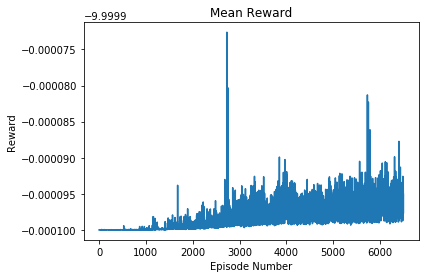

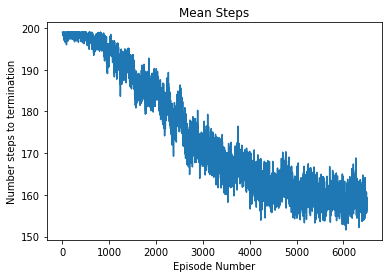

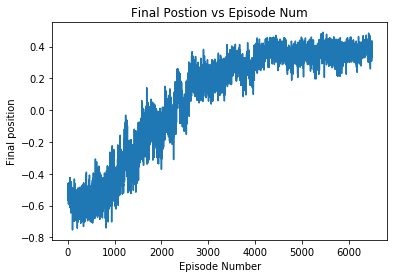

In [121]:
plt.plot(np.array(rewardHis_mean))
plt.title('Mean Reward')
plt.xlabel('Episode Number')
plt.ylabel('Reward')
plt.show()

plt.plot(stepHis_mean)
plt.title('Mean Steps')
plt.xlabel('Episode Number')
plt.ylabel('Number steps to termination')
plt.show()



plt.plot(posHistory_mean, '')
plt.xlabel('Episode Number')
plt.title('Final Postion vs Episode Num')
plt.ylabel('Final position')
plt.show()

In [189]:
# To obtain the optimal policy.
Q = Q_mean
policy = {}
for p in range(num_states[0]):
    max_v = 1
    max_q = -237293
    for v in range(num_states[1]):
        for a in Actions:
            if (Q[(p, v)][a] > max_q):
                max_q = Q[(p, v)][a]
                policy[p * bin_size[0] + lo[0]] = v * bin_size[1] + lo[1]
    
lists = sorted(policy.items())



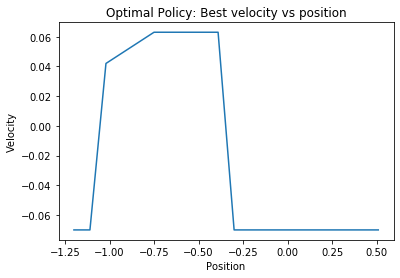

In [228]:
x, y = zip(*lists)
plt.plot(x, y)
plt.title('Optimal Policy: Best velocity vs position')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.show()

In [124]:
render_q(Q_mean)

199


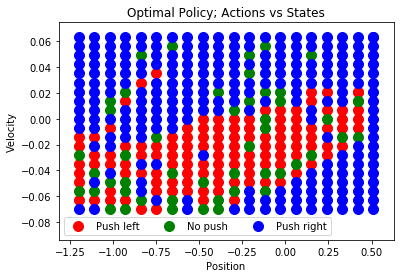

In [227]:
#Optimal Policy Visualizing the actions 
ac = {}
ac[0] = []
ac[1] = []
ac[2] = []
for s in States: #tates:
#     s = random.choice(States)
    a = max_q(Q_mean, s)
    ac[a].append(([s[0] * bin_size[0] + lo[0]], s[1] * bin_size[1] + lo[1]))
#     plt.scatter(s[0] * bin_size[0] + lo[0], s[1] * bin_size[1] + lo[1])


# print(ac.keys())
value = ac[0]
# print(len(value.items()))
for k in value:
    plt.scatter([k[0]], k[1], c='red', s = 100)
plt.scatter([k[0]], k[1], c='red', s = 100, label = 'Push left')

    
value = ac[1]
# print(len(value.items()))
for k in value:
    plt.scatter([k[0]], k[1], c='green', s= 100)
plt.scatter([k[0]], k[1], c='green', s= 100, label = 'No push')
value = ac[2]
# print(len(value.items()))
for k in value:
    plt.scatter([k[0]], k[1], c='blue', s=100)
plt.scatter([k[0]], k[1], c='blue', s=100,label = 'Push right')
    

plt.title('Optimal Policy; Actions vs States')
plt.xlabel('Position')
plt.ylabel('Velocity')    
plt.legend(ncol = 5)
plt.show()
     


([-1.2000000476837158], -0.03500000014901161)
